In [1]:
import numpy as np
from qiskit import *
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from math import pi

simulator = QasmSimulator()
cir = QuantumCircuit(5,4)

cir.x(3)
cir.h(0)
cir.h(1)
cir.h(2)
cir.ccx(0,1,4)
cir.ccx(2,4,3)
cir.ccx(0,1,4)
cir.x(0)
cir.x(1)
cir.x(2)
cir.x(3)
cir.u(pi/2, 0, pi, 0)
cir.u(pi/2, 0, 0, 1)
cir.u(-pi/2, 0, pi, 2)
cir.draw()

┌───┐               ┌───┐ ┌────────────┐
q_0: ┤ H ├──■─────────■──┤ X ├─┤ U(π/2,0,π) ├
     ├───┤  │         │  ├───┤ ├────────────┤
q_1: ┤ H ├──■─────────■──┤ X ├─┤ U(π/2,0,0) ├
     ├───┤  │         │  ├───┤┌┴────────────┤
q_2: ┤ H ├──┼────■────┼──┤ X ├┤ U(-π/2,0,π) ├
     ├───┤  │  ┌─┴─┐  │  ├───┤└─────────────┘
q_3: ┤ X ├──┼──┤ X ├──┼──┤ X ├───────────────
     └───┘┌─┴─┐└─┬─┘┌─┴─┐└───┘               
q_4: ─────┤ X ├──■──┤ X ├────────────────────
          └───┘     └───┘                    
c: 4/════════════════════════════════════════

In [2]:
from qiskit.quantum_info import Statevector
state = Statevector.from_int(0, 2**5)
state = state.evolve(cir)
state.draw('latex')

<IPython.core.display.Latex object>

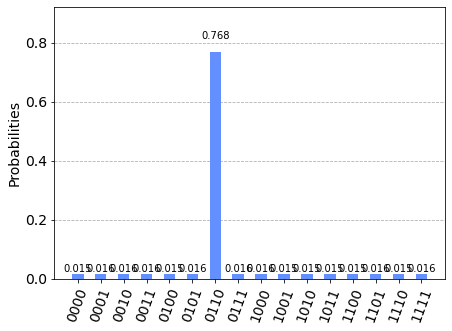

In [3]:
cir.measure([0,1,2,3], [0,1,2,3])
cc = transpile(cir, simulator)
job = simulator.run(cc, shots=100000)
result = job.result()
counts = result.get_counts(cc)
plot_histogram(counts)

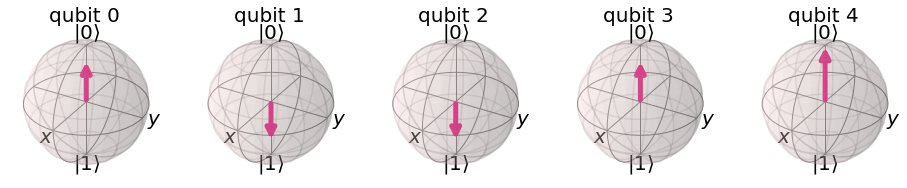

In [5]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(state)

In [6]:
cir2 = QuantumCircuit(5,4)

cir2.x(3)
cir2.h(0)
cir2.h(1)
cir2.h(2)
cir2.ccx(0,1,4)
cir2.ccx(2,4,3)
cir2.ccx(0,1,4)
cir2.x(0)
cir2.x(1)
cir2.x(2)
cir2.x(3)
cir2.u(pi/2, 0, pi, 0)
cir2.u(pi/2, 0, 0, 1)
cir2.u(pi/2, 0, pi, 2)
cir2.draw()

┌───┐               ┌───┐┌────────────┐
q_0: ┤ H ├──■─────────■──┤ X ├┤ U(π/2,0,π) ├
     ├───┤  │         │  ├───┤├────────────┤
q_1: ┤ H ├──■─────────■──┤ X ├┤ U(π/2,0,0) ├
     ├───┤  │         │  ├───┤├────────────┤
q_2: ┤ H ├──┼────■────┼──┤ X ├┤ U(π/2,0,π) ├
     ├───┤  │  ┌─┴─┐  │  ├───┤└────────────┘
q_3: ┤ X ├──┼──┤ X ├──┼──┤ X ├──────────────
     └───┘┌─┴─┐└─┬─┘┌─┴─┐└───┘              
q_4: ─────┤ X ├──■──┤ X ├───────────────────
          └───┘     └───┘                   
c: 4/═══════════════════════════════════════

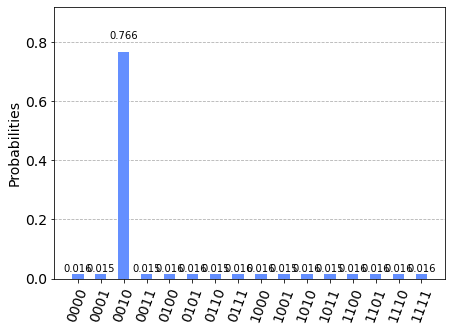

In [7]:
cir2.measure([0,1,2,3], [0,1,2,3])
cc = transpile(cir2, simulator)
job = simulator.run(cc, shots=100000)
result = job.result()
counts = result.get_counts(cc)
plot_histogram(counts)